In [1]:
autosave 3

Autosaving every 3 seconds


# what's spoppin?
Author: Erin Vu

## Overview

This project is an analysis and prediction of [popularity of Spotify tracks from the Kaggle datset](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks) in order to provide music production companies with a good idea of the attributes of popular songs. As a result of iterating through linear regression and random forest regression models, the most impactful feature through random forest regression was acousticness and can recommend to not release primarily acoustic songs. 

## Business problem

The business problem for our music production stakeholders is what attributes make a popular song. Music production companies need to know generally what people like to listen to, and with this project we can find those optimal features. We will be using linear regression and random forest regression to predict popularity of songs based on the feature data. With this information, production companies will be able to produce new popular songs.


## Data Understanding

The Spotfy dataset from Kaggle has almost 600,000 songs and 20 columns. The target variable is Popularity and the other features wil be used to predict the target variable. The variables are listed below as they were in the dataset descriptionset on Kaggle and the main predictor variables for this will be the numerical features such as acousticness, danceability, energy, etc.

Primary:

- id (Id of track generated by Spotify)

Numerical:

- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0)
- speechiness (Ranges from 0 to 1)

Dummy:

- mode (0 = Minor, 1 = Major)
- explicit (0 = No explicit content, 1 = Explicit content)


Categorical:

- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
- timesignature (The predicted timesignature, most typically 4)
- artists (List of artists mentioned)
- artists (Ids of mentioned artists)
- release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
- name (Name of the song)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
tracks = pd.read_csv('./data/tracks.csv')

In [4]:
tracks

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [5]:
genres = pd.read_csv('./data/data_by_genres_o.csv')
genres

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,1,zolo,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2969,0,zouglou,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7
2970,1,zouk,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5
2971,0,zurich indie,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7


In [6]:
year = pd.read_csv('./data/data_by_year_o.csv')
year

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,2016,0.284171,0.600202,221396.510295,0.592855,0.093984,0.181170,-8.061056,0.104313,118.652630,0.431532,59.647190,0
96,1,2017,0.286099,0.612217,211115.696787,0.590421,0.097091,0.191713,-8.312630,0.110536,117.202740,0.416476,63.263554,1
97,1,2018,0.267633,0.663500,206001.007133,0.602435,0.054217,0.176326,-7.168785,0.127176,121.922308,0.447921,63.296243,1
98,1,2019,0.278299,0.644814,201024.788096,0.593224,0.077640,0.172616,-7.722192,0.121043,120.235644,0.458818,65.256542,1


In [7]:
artists = pd.read_csv('./data/artists.csv')
artists

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0
...,...,...,...,...,...
1104344,6rJIG42vcWAf1UBdRFlQxB,3345.0,[],Cody Longo,8
1104345,1ljurfXKPlGncNdW3J8zJ8,2123.0,['deep acoustic pop'],Right the Stars,18
1104346,2vnT9YhKIvjVo9LnVjWmr2,26.0,[],Jesse Giddings,0
1104347,3ID0E5XCvnJIYZEq043ZoB,406.0,[],The Boy Band Project,0


In [8]:
data_by_artists = pd.read_csv('./data/data_by_artist_o.csv')
data_by_artists

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28675,[],麥志誠,0.512000,0.356000,198773.000000,0.306000,0.008970,0.108000,-10.119000,0.027700,150.049000,0.328000,35.000000,10,1,2
28676,"['c-pop', 'classic cantopop', 'classic mandopo...",黃品源,0.541000,0.578000,293840.000000,0.334000,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,48.000000,9,0,2
28677,[],黃國隆,0.785455,0.570818,174582.727273,0.148400,0.000083,0.142191,-21.610091,0.054355,119.586273,0.741273,23.000000,5,1,11
28678,"['chinese indie', 'chinese indie rock']",黑豹,0.381000,0.353000,316160.000000,0.686000,0.000000,0.056800,-9.103000,0.039500,200.341000,0.352000,35.000000,11,1,2


In [9]:
tracks.drop(['id', 'name', 'id_artists'], axis=1, inplace=True)

In [10]:
tracks['release_date'] = pd.to_datetime(tracks['release_date'])

In [11]:
tracks['release_date'] = tracks['release_date'].dt.year

In [12]:
tracks

,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,6,126903,0,['Uli'],1922,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,0,98200,0,['Fernando Pessoa'],1922,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,0,181640,0,['Ignacio Corsini'],1922,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,0,176907,0,['Ignacio Corsini'],1922,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,0,163080,0,['Dick Haymes'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,50,258267,0,['阿YueYue'],2020,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,72,153293,0,['ROLE MODEL'],2020,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,70,187601,0,['FINNEAS'],2020,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,58,142003,0,"['Gentle Bones', 'Clara Benin']",2021,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [13]:
tracks.duplicated().sum()

2009

In [14]:
tracks.isna().sum()

popularity          0
duration_ms         0
explicit            0
artists             0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [15]:
tracks = tracks.drop_duplicates()

In [16]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584663 entries, 0 to 586671
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        584663 non-null  int64  
 1   duration_ms       584663 non-null  int64  
 2   explicit          584663 non-null  int64  
 3   artists           584663 non-null  object 
 4   release_date      584663 non-null  int64  
 5   danceability      584663 non-null  float64
 6   energy            584663 non-null  float64
 7   key               584663 non-null  int64  
 8   loudness          584663 non-null  float64
 9   mode              584663 non-null  int64  
 10  speechiness       584663 non-null  float64
 11  acousticness      584663 non-null  float64
 12  instrumentalness  584663 non-null  float64
 13  liveness          584663 non-null  float64
 14  valence           584663 non-null  float64
 15  tempo             584663 non-null  float64
 16  time_signature    58

#### Target: Popularity analysis

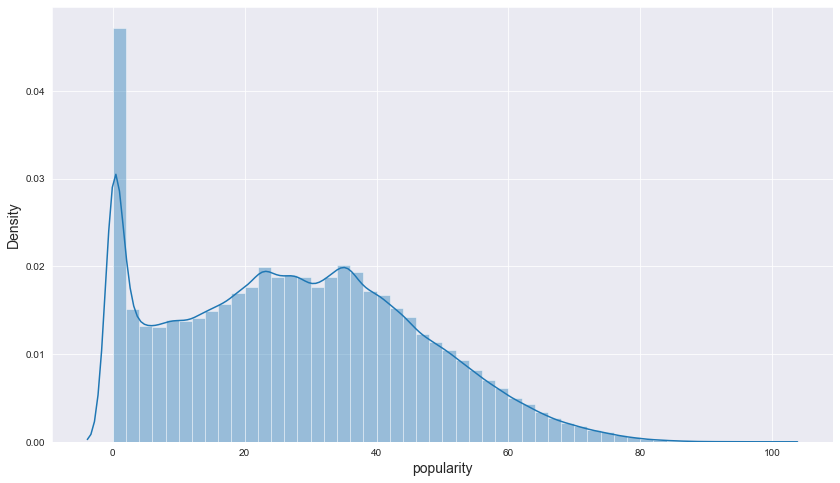

In [17]:
fig, ax = plt.subplots(figsize=(14,8))
sns.distplot(tracks['popularity'], ax=ax)
ax.set_xlabel(tracks['popularity'].name, fontsize=14)
ax.set_ylabel('Density', fontsize=14);

In [18]:
#x_num = tracks.drop('artists', axis=1)

In [19]:
#sns.pairplot(x_num.sample(10000))

In [20]:
pop_corr = abs(tracks.corr()[['popularity']]).sort_values('popularity', ascending=False)
pop_corr

,popularity
popularity,1.000000
release_date,0.594047
acousticness,0.372003
loudness,0.328481
energy,0.302996
instrumentalness,0.234479
explicit,0.212535
danceability,0.188019
time_signature,0.086895
tempo,0.070704


In [21]:
pop_corr.index

Index(['popularity', 'release_date', 'acousticness', 'loudness', 'energy',
       'instrumentalness', 'explicit', 'danceability', 'time_signature',
       'tempo', 'liveness', 'speechiness', 'mode', 'duration_ms', 'key',
       'valence'],
      dtype='object')

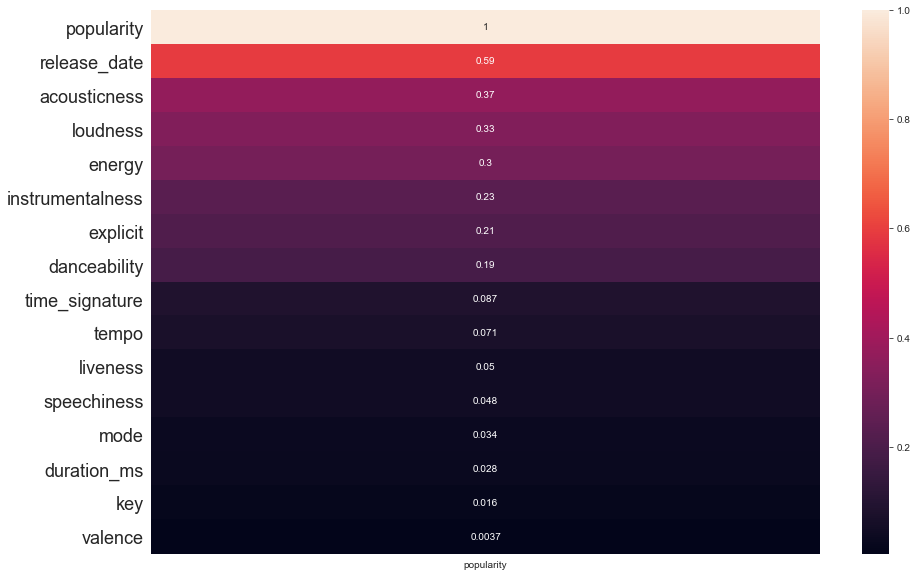

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(pop_corr, ax=ax, annot=True)
ax.set_yticklabels(labels=pop_corr.index, fontsize=18);

In [23]:
corr = abs(tracks.corr())
corr

,popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,0.028155,0.212535,0.594047,0.188019,0.302996,0.015541,0.328481,0.034274,0.048057,0.372003,0.234479,0.049658,0.003715,0.070704,0.086895
duration_ms,0.028155,1.000000,0.016704,0.054240,0.120677,0.024675,0.004450,0.000144,0.027686,0.126073,0.064318,0.068563,0.002298,0.162754,0.001220,0.037334
explicit,0.212535,0.016704,1.000000,0.208672,0.150154,0.123059,0.011253,0.134764,0.051561,0.102188,0.148970,0.067146,0.012922,0.016675,0.005529,0.044443
release_date,0.594047,0.054240,0.208672,1.000000,0.224035,0.457994,0.023735,0.445148,0.080891,0.082645,0.525542,0.219534,0.020711,0.026629,0.119439,0.115458
danceability,0.188019,0.120677,0.150154,0.224035,1.000000,0.239871,0.018779,0.249385,0.044294,0.199376,0.241448,0.225427,0.106161,0.527925,0.041931,0.145421
energy,0.302996,0.024675,0.123059,0.457994,0.239871,1.000000,0.036317,0.764628,0.065009,0.053866,0.714777,0.194523,0.124991,0.372110,0.229678,0.188597
key,0.015541,0.004450,0.011253,0.023735,0.018779,0.036317,1.000000,0.026880,0.129845,0.001058,0.027504,0.006878,0.006681,0.019941,0.004973,0.008828
loudness,0.328481,0.000144,0.134764,0.445148,0.249385,0.764628,0.026880,1.000000,0.040303,0.168166,0.519031,0.328639,0.029517,0.274734,0.188504,0.162991
mode,0.034274,0.027686,0.051561,0.080891,0.044294,0.065009,0.129845,0.040303,1.000000,0.018056,0.058487,0.010182,0.006677,0.011393,0.007759,0.015992
speechiness,0.048057,0.126073,0.102188,0.082645,0.199376,0.053866,0.001058,0.168166,0.018056,1.000000,0.069373,0.102242,0.207364,0.046160,0.087510,0.114575


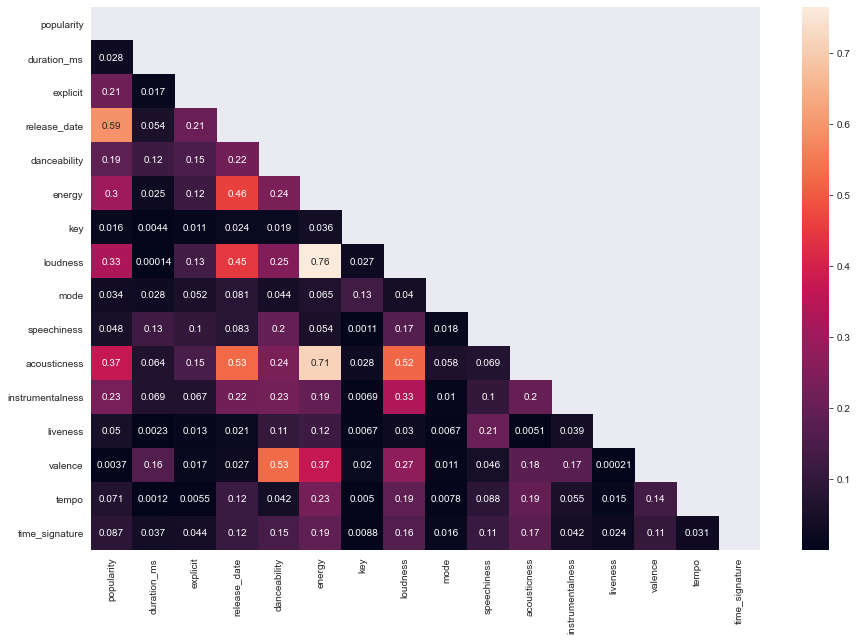

In [24]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, ax=ax, annot=True, mask=np.triu(np.ones_like(corr, dtype=bool)));

### Feature Exploration

In [25]:
def feature_corr(feature):
    feature_corr = tracks['popularity'].corr(tracks[feature])
    return print(f'Correlation to popularity with {feature} is {feature_corr}')

#### Artists

In [26]:
unique_artists = tracks['artists'].nunique()

In [27]:
print(f'Unique artists: {unique_artists}')

Unique artists: 114030


In [28]:
artist_pop = tracks.groupby('artists')['popularity'].sum().sort_values(ascending=False)
top_25 = artist_pop[:25]

In [29]:
top_25

artists
['Die drei ???']                              140705
['TKKG Retro-Archiv']                          58554
['Bibi Blocksberg']                            49785
['Benjamin Blümchen']                          42288
['Bibi und Tina']                              31641
['Queen']                                      29352
['Fünf Freunde']                               22190
['Elvis Presley']                              21779
['Pink Floyd']                                 21489
['Taylor Swift']                               21467
['The Rolling Stones']                         20985
['The Beatles']                                20129
['Tintin', 'Tomas Bolme', 'Bert-Åke Varg']     19653
['Fleetwood Mac']                              18128
['Frank Sinatra']                              17152
['Julio Iglesias']                             16896
['Metallica']                                  16637
['Luis Miguel']                                15802
['BTS']                               

Text(0, 0.5, 'sum popularity')

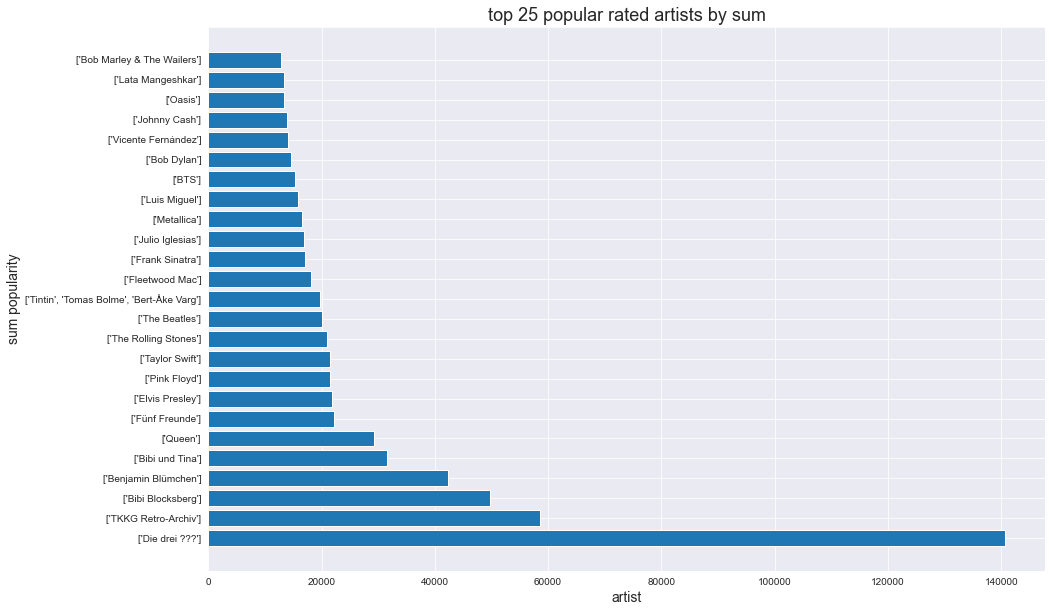

In [30]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.barh(top_25.index, top_25.values)
ax.set_title('top 25 popular rated artists by sum', fontsize=18)
ax.set_xlabel('artist', fontsize=14)
ax.set_ylabel('sum popularity', fontsize=14)

In [31]:
tracks['pop_artists_100songs'] = tracks['artists'].map(tracks['artists'].value_counts() > 100)

In [32]:
tracks.shape

(584663, 18)

In [33]:
pop_artists = tracks[tracks['pop_artists_100songs']== True]

In [34]:
pop_artists['pop_artists_100songs'].value_counts()

True    114304
Name: pop_artists_100songs, dtype: int64

In [35]:
pop_artists

,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,pop_artists_100songs
2,0,181640,0,['Ignacio Corsini'],1922,0.434,0.1770,1,-21.180,1,0.0512,0.994000,0.021800,0.2120,0.457,130.418,5,True
3,0,176907,0,['Ignacio Corsini'],1922,0.321,0.0946,7,-27.961,1,0.0504,0.995000,0.918000,0.1040,0.397,169.980,3,True
9,0,181173,0,['Ignacio Corsini'],1922,0.548,0.0391,6,-23.228,1,0.1530,0.996000,0.933000,0.1480,0.612,75.595,3,True
19,0,153533,0,['Ignacio Corsini'],1922,0.370,0.3720,2,-17.138,1,0.0865,0.985000,0.000681,0.9290,0.753,159.669,4,True
22,0,181440,0,['Ignacio Corsini'],1922,0.339,0.0958,8,-26.944,1,0.0530,0.994000,0.969000,0.1230,0.219,86.279,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586521,35,289480,0,['Jay Chou'],2014,0.523,0.5720,1,-6.834,1,0.0274,0.356000,0.000001,0.1210,0.306,106.943,4,True
586580,49,307520,0,['Hillsong Worship'],2016,0.408,0.5190,9,-8.732,1,0.0311,0.106000,0.000000,0.9600,0.212,141.883,4,True
586608,1,40680,0,['Armin van Buuren'],2018,0.572,0.6660,11,-10.493,0,0.3080,0.137000,0.000000,0.5640,0.957,129.118,3,True
586619,1,41739,0,['Armin van Buuren'],2020,0.597,0.9530,1,-7.136,1,0.1240,0.000151,0.249000,0.6840,0.184,138.006,4,True


In [36]:
top_pop_artists = pop_artists.groupby('artists')['popularity'].mean().sort_values(ascending=False)
top_pop_artists

artists
['Drake']                                                 62.689320
['Taylor Swift']                                          60.813031
['Arctic Monkeys']                                        60.028037
['BTS']                                                   59.482625
['Eminem']                                                58.302817
                                                            ...    
['Franz Joseph Haydn', 'Pro Arte Quartet']                 0.000000
['Arthur Conan Doyle']                                     0.000000
['Janusz Korczak']                                         0.000000
['Юрий Тынянов']                                           0.000000
['Radclyffe Hall', 'Alice White', 'Synthesized Voice']     0.000000
Name: popularity, Length: 557, dtype: float64

In [37]:
top_25_artists = top_pop_artists[:25]
top_25_artists

artists
['Drake']                                                     62.689320
['Taylor Swift']                                              60.813031
['Arctic Monkeys']                                            60.028037
['BTS']                                                       59.482625
['Eminem']                                                    58.302817
['Lana Del Rey']                                              58.127660
['Linkin Park']                                               55.884298
['Jorge & Mateus']                                            52.468750
['Rammstein']                                                 51.451389
['Red Hot Chili Peppers']                                     50.698225
['Jack Johnson']                                              50.596491
['Green Day']                                                 50.588235
['Maná']                                                      49.633028
['Demi Lovato']                                         

Text(0, 0.5, 'artist')

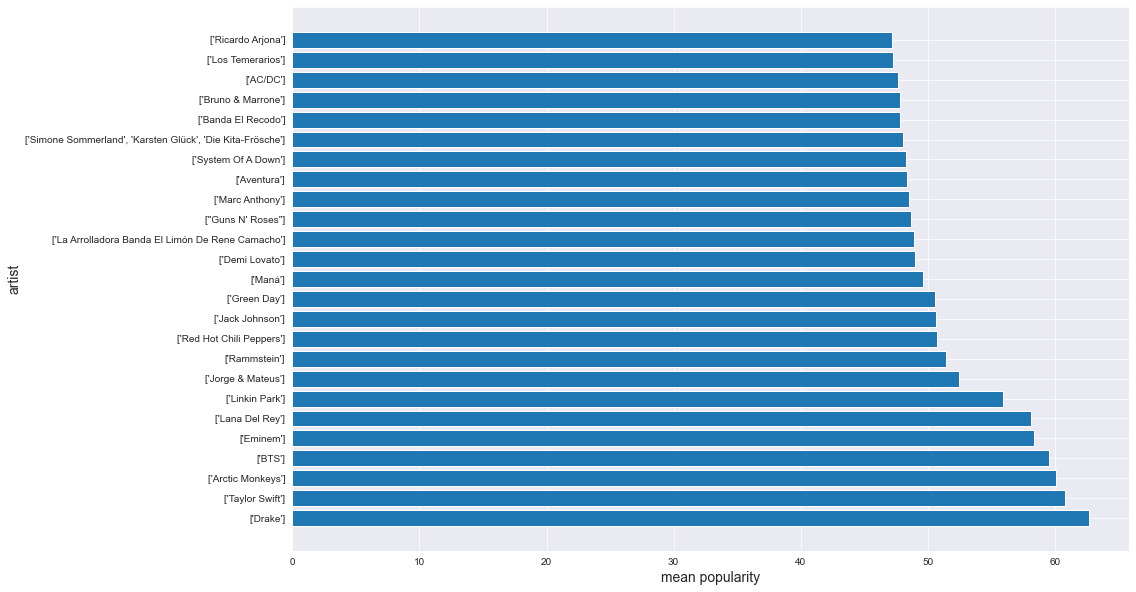

In [38]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.barh(top_25_artists.index, top_25_artists.values)
#ax.set_title('top 25 popular rated artists by mean with greater than 100 songs', fontsize=18)
ax.set_xlabel('mean popularity', fontsize=14)
ax.set_ylabel('artist', fontsize=14)

In [39]:
tracks['mean'] = tracks.groupby('artists')['popularity'].transform('mean')

In [40]:
tracks['count'] = tracks.groupby('artists')['popularity'].transform('count')

<AxesSubplot:xlabel='count', ylabel='Density'>

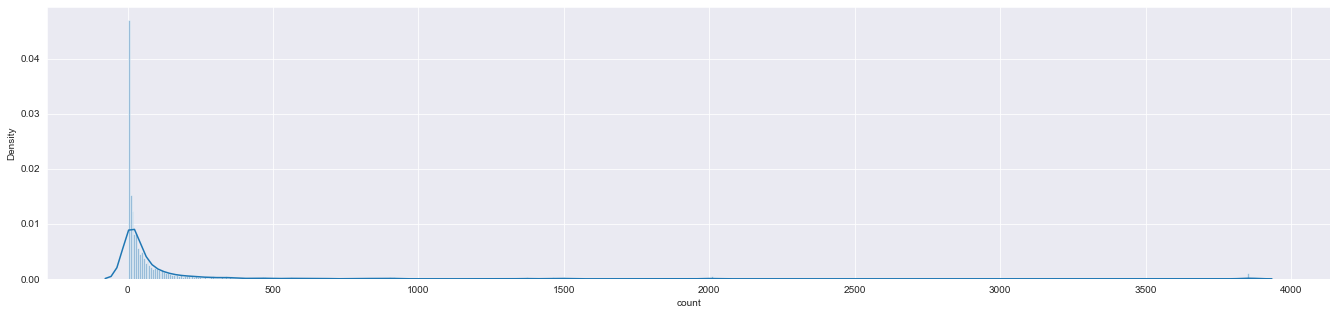

In [41]:
fig, ax = plt.subplots(figsize=(23,5))
sns.distplot(tracks['count'], bins = 600, ax=ax)

<AxesSubplot:xlabel='count'>

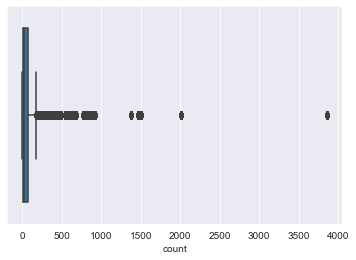

In [42]:
sns.boxplot(tracks['count'])

<AxesSubplot:xlabel='count'>

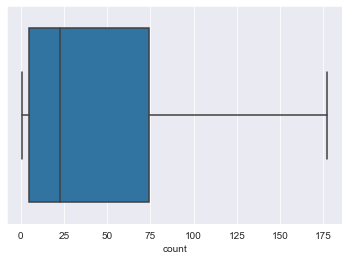

In [43]:
sns.boxplot(tracks['count'], showfliers=False)

In [44]:
multiple = tracks[['artists', 'mean']].loc[tracks['count']>900].value_counts(ascending=False).reset_index()
multiple

,artists,mean,0
0,['Die drei ???'],36.489886,3856
1,['TKKG Retro-Archiv'],29.189432,2006
2,['Benjamin Blümchen'],28.192000,1500
3,['Bibi Blocksberg'],34.052668,1462
4,['Lata Mangeshkar'],9.754745,1370
5,['Bibi und Tina'],34.580328,915
6,"['Tintin', 'Tomas Bolme', 'Bert-Åke Varg']",21.716022,905


#### Explicit

explicit (0 = No explicit content, 1 = Explicit content)

In [45]:
feature_corr('explicit')

Correlation to popularity with explicit is 0.21253530386223143


In [46]:
explicit=tracks['explicit']
y_explicit = ['no explicit', 'explicit']

Text(0.5, 1.0, 'Explicit vs No Explicit')

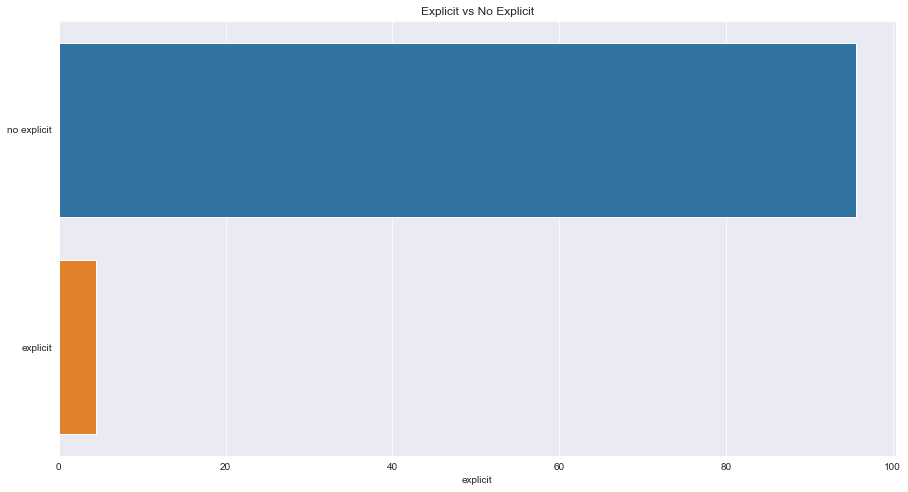

In [47]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(explicit.value_counts(normalize=True)*100,y=y_explicit, data=tracks, ax=ax)
ax.set_title('Explicit vs No Explicit')

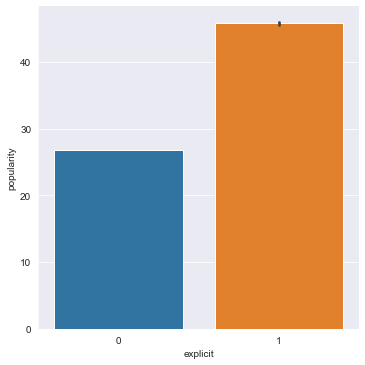

In [48]:
sns.catplot(data=tracks, kind='bar', x='explicit', y='popularity')

Above we can see that the majority of the values for explicit are not explicit and the correlation is 0.21. 

#### Key

In [49]:
tracks['popularity'].corr(tracks['key'])

0.015541091149826589

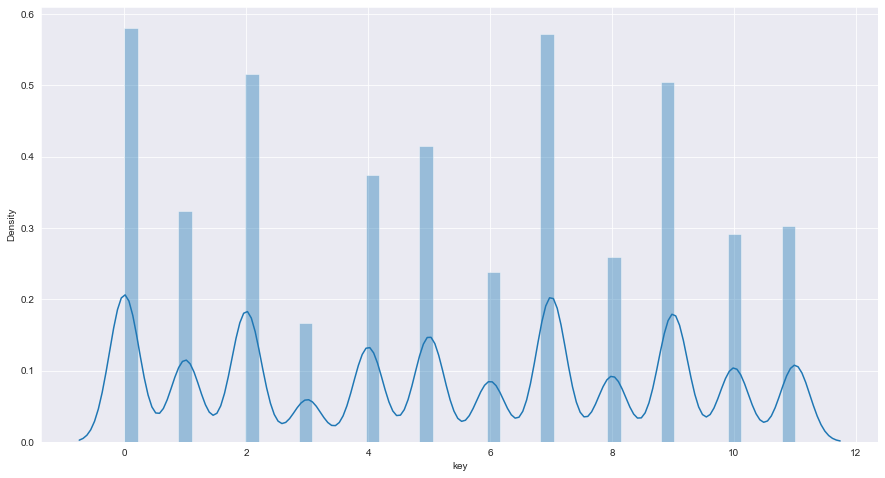

In [50]:
fig, ax = plt.subplots(figsize=(15,8))
sns.distplot(tracks['key'], ax=ax);

In [51]:
tracks['key'].value_counts(normalize=True)

0     0.127812
7     0.125826
2     0.113489
9     0.111138
5     0.091436
4     0.082225
1     0.071085
11    0.066625
10    0.064225
8     0.056985
6     0.052517
3     0.036636
Name: key, dtype: float64

#### Mode

mode (0 = Minor, 1 = Major)


In [52]:
tracks['mode'].value_counts(normalize=True)

1    0.658947
0    0.341053
Name: mode, dtype: float64

In [53]:
tracks['mode'].value_counts().index

Int64Index([1, 0], dtype='int64')

Text(0, 0.5, '%')

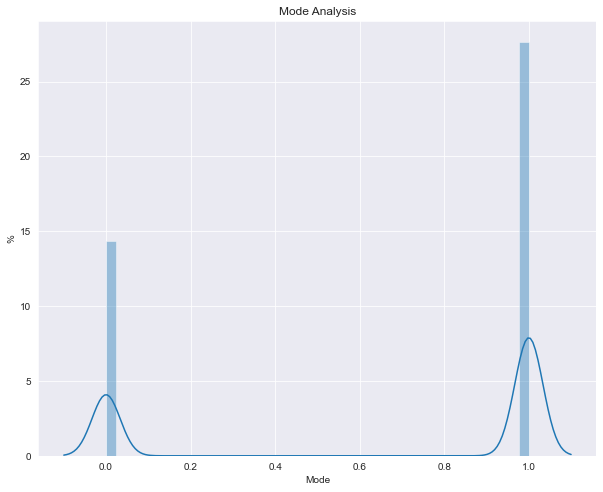

In [54]:
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(tracks['mode'], ax=ax)
ax.set_title('Mode Analysis')
ax.set_xlabel('Mode')
ax.set_ylabel('%')
#ax.set_xticks(['Minor', 'Major'])

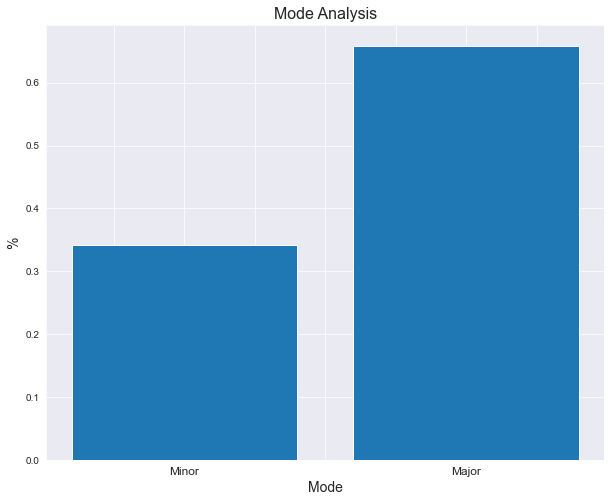

In [55]:
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(tracks['mode'].value_counts().index, tracks['mode'].value_counts(normalize=True).values)
ax.set_title('Mode Analysis', fontsize=16)
ax.set_xlabel('Mode', fontsize=14)
ax.set_ylabel('%', fontsize=14)
ax.set_xticklabels([' ', ' ', 'Minor', ' ', ' ', ' ', 'Major'], fontsize=12);

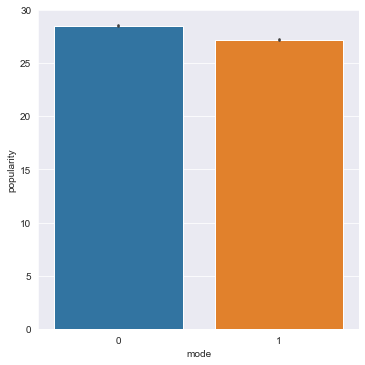

In [56]:
sns.catplot(data=tracks, kind='bar', x='mode', y='popularity')

#### Time Signature

In [57]:
feature_corr('time_signature')

Correlation to popularity with time_signature is 0.0868947454988907


<BarContainer object of 5 artists>

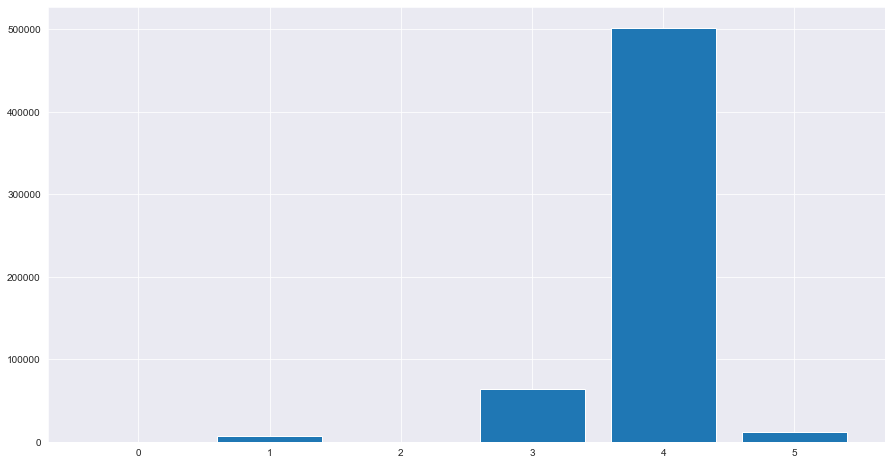

In [58]:
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(tracks['time_signature'].value_counts().index, tracks['time_signature'].value_counts().values)

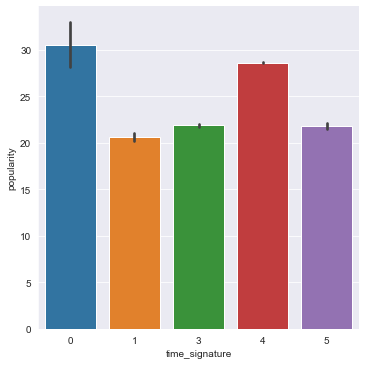

In [59]:
sns.catplot(data=tracks, kind='bar', x='time_signature', y='popularity')

### song attributes

In [60]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584663 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   popularity            584663 non-null  int64  
 1   duration_ms           584663 non-null  int64  
 2   explicit              584663 non-null  int64  
 3   artists               584663 non-null  object 
 4   release_date          584663 non-null  int64  
 5   danceability          584663 non-null  float64
 6   energy                584663 non-null  float64
 7   key                   584663 non-null  int64  
 8   loudness              584663 non-null  float64
 9   mode                  584663 non-null  int64  
 10  speechiness           584663 non-null  float64
 11  acousticness          584663 non-null  float64
 12  instrumentalness      584663 non-null  float64
 13  liveness              584663 non-null  float64
 14  valence               584663 non-null  float64
 15  

In [61]:
def feature_analysis(feature):
    '''Creates distplot and graph of feature and mean of popularity'''
    
    fig, ax = plt.subplots(figsize=(15,8))
    sns.distplot(tracks[feature], ax=ax)
    ax.set_title(f'{feature.title()} Distribution', fontsize=16)
    ax.set_xlabel(f'{feature.title()}', fontsize=14)
    ax.set_ylabel('Density', fontsize=14)
    
    feature_pop_mean = tracks.groupby(feature)['popularity'].mean()
    
    fig, ax = plt.subplots(figsize=(15,8))
    ax.scatter(feature_pop_mean.index, feature_pop_mean.values, alpha=.3)
    ax.set_title(f'{feature.title()} vs Mean Popularity', fontsize=16)
    ax.set_xlabel(f'{feature.title()}', fontsize=14)
    ax.set_ylabel('Mean Popularity', fontsize=14)
    return plt.show();

#### Danceability

In [62]:
feature_corr('danceability')

Correlation to popularity with danceability is 0.18801923603338333


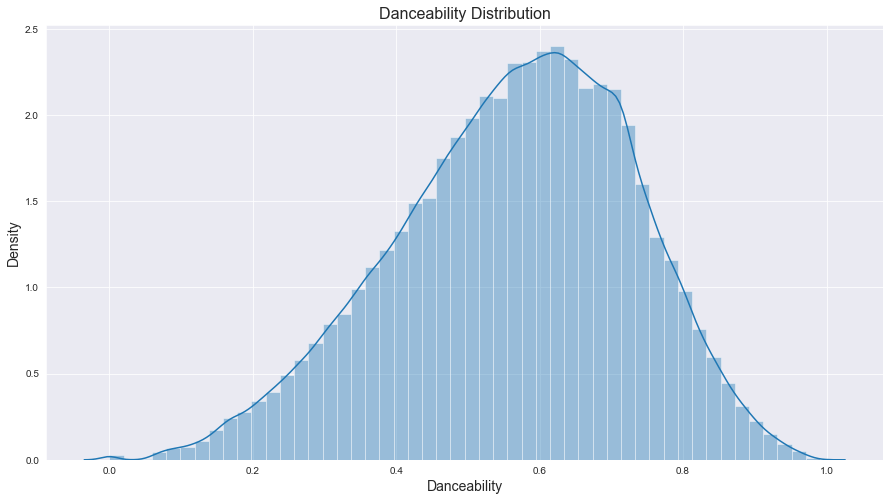

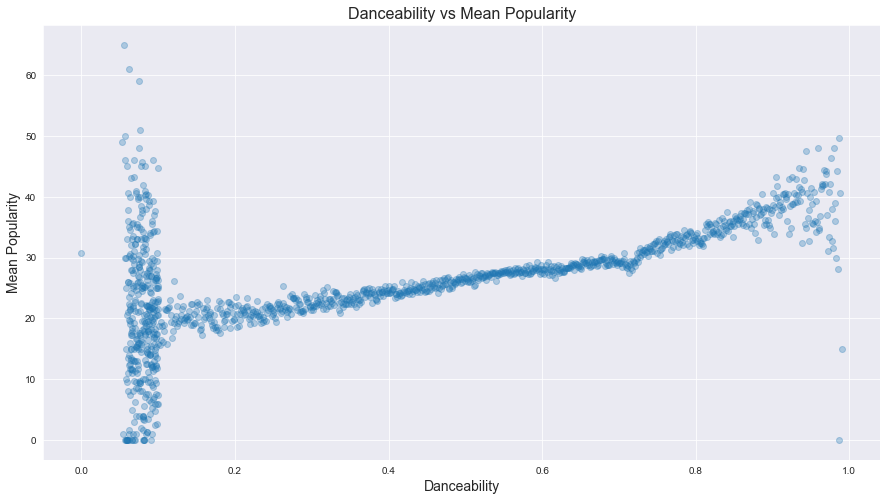

In [63]:
feature_analysis('danceability')

#### Energy

In [64]:
feature_corr('energy')

Correlation to popularity with energy is 0.3029963744049277


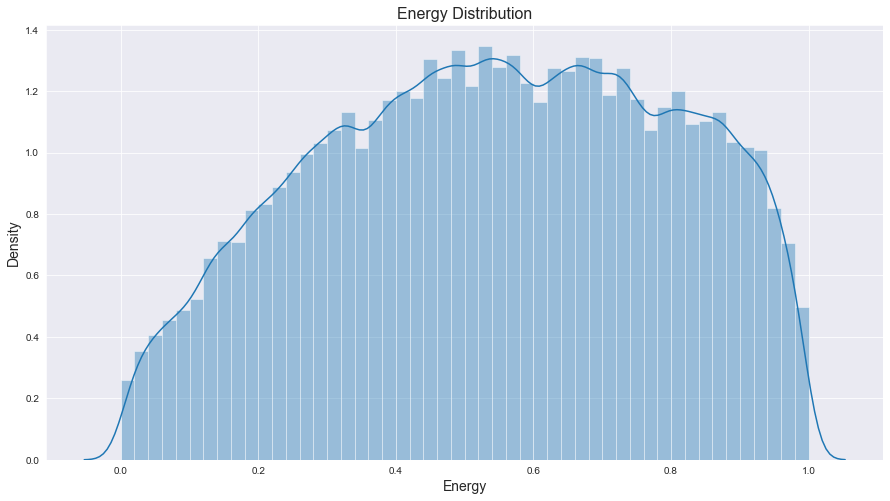

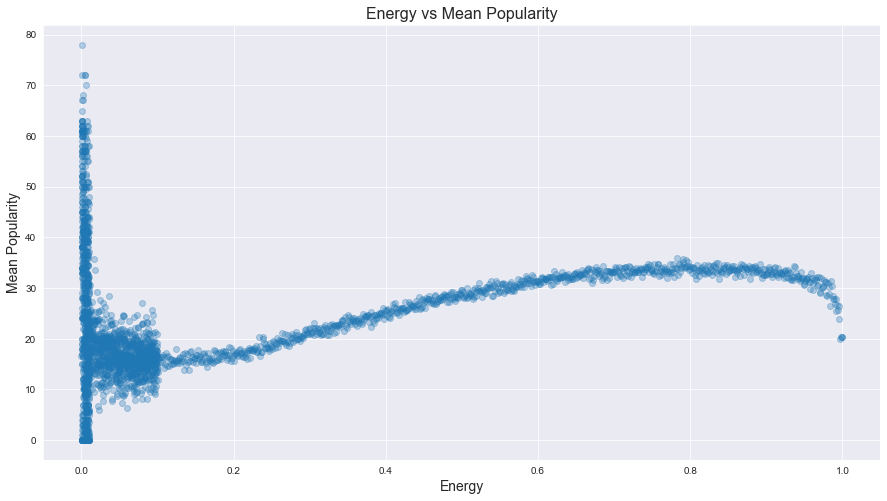

In [65]:
feature_analysis('energy')

#### Acousticness

In [66]:
feature_corr('acousticness')

Correlation to popularity with acousticness is -0.3720031423200711


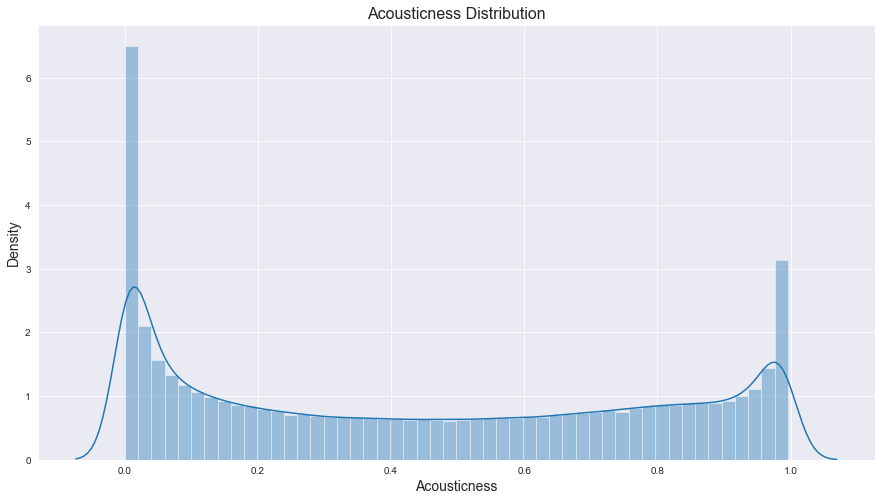

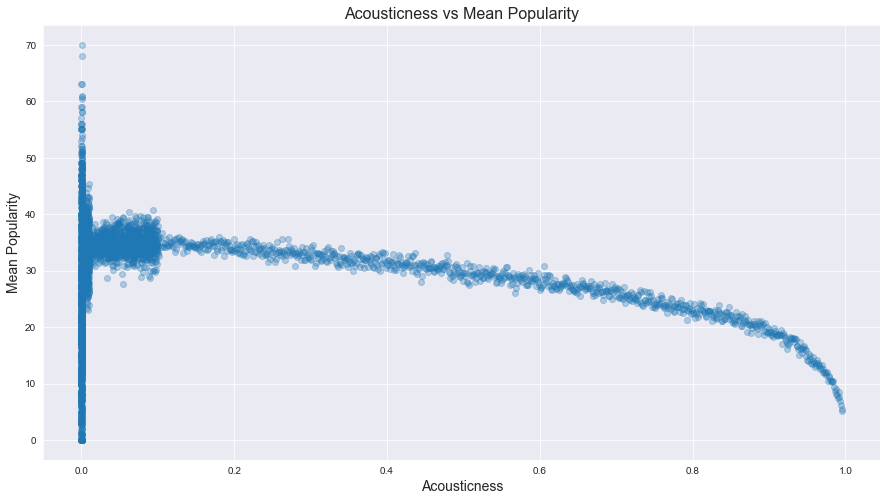

In [67]:
feature_analysis('acousticness')

#### Loudness

In [68]:
feature_corr('loudness')

Correlation to popularity with loudness is 0.32848111278596537


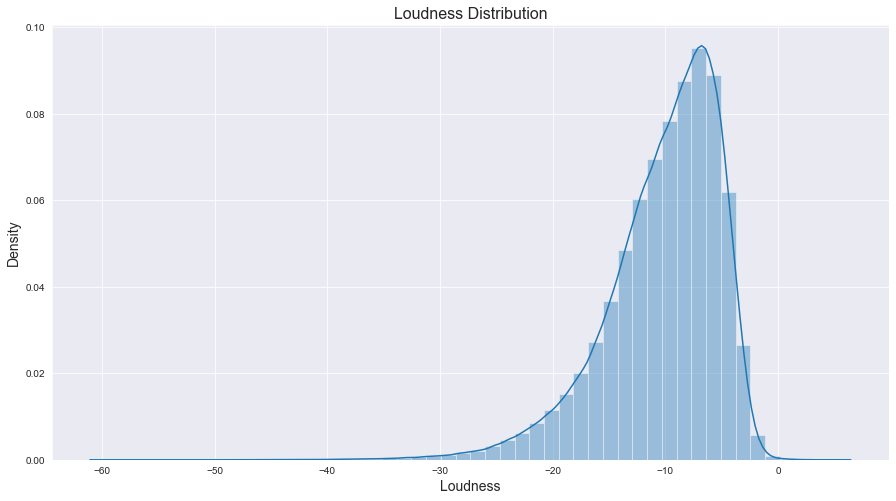

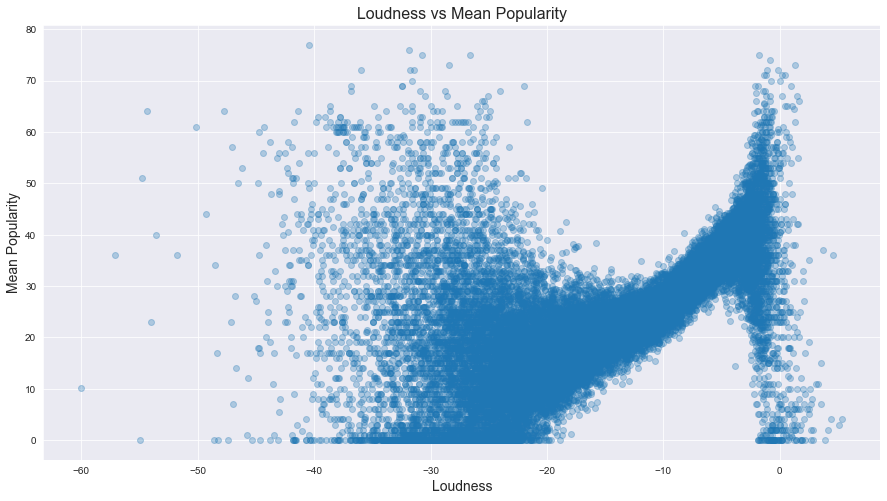

In [69]:
feature_analysis('loudness')

#### Speechiness

In [70]:
feature_corr('speechiness')

Correlation to popularity with speechiness is -0.04805705855431659


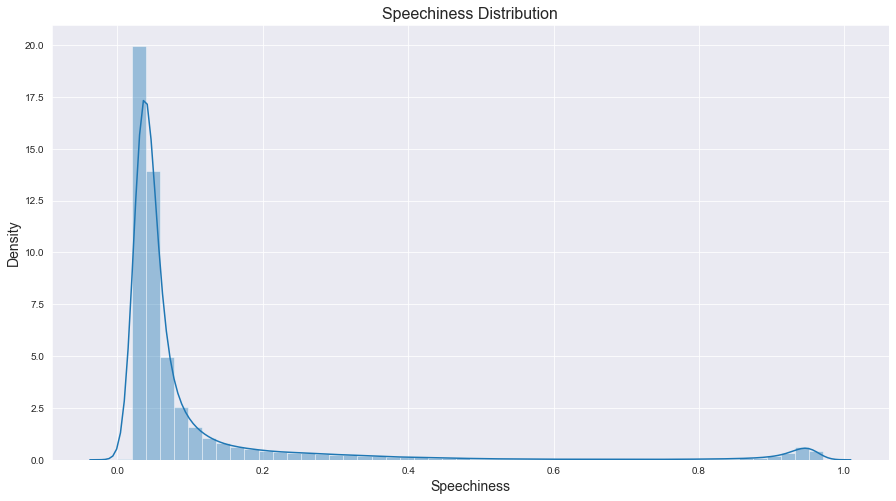

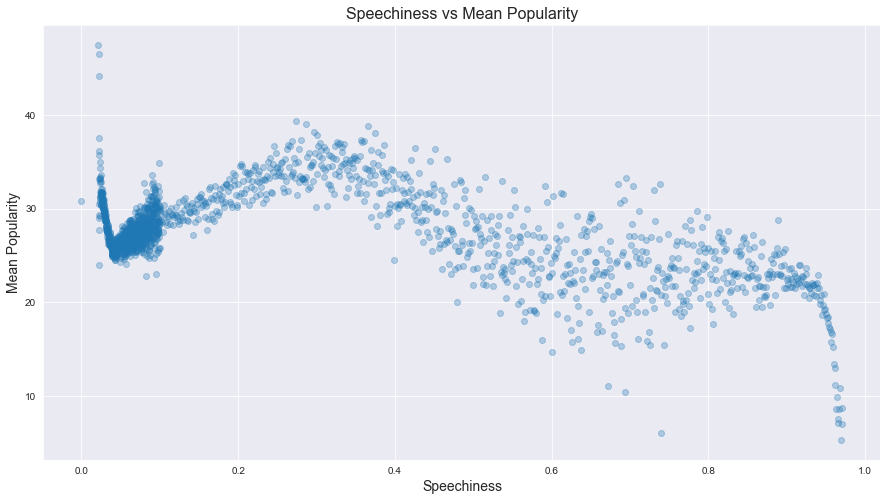

In [71]:
feature_analysis('speechiness')

#### Instrumentalness

In [72]:
feature_corr('instrumentalness')

Correlation to popularity with instrumentalness is -0.23447899687232618


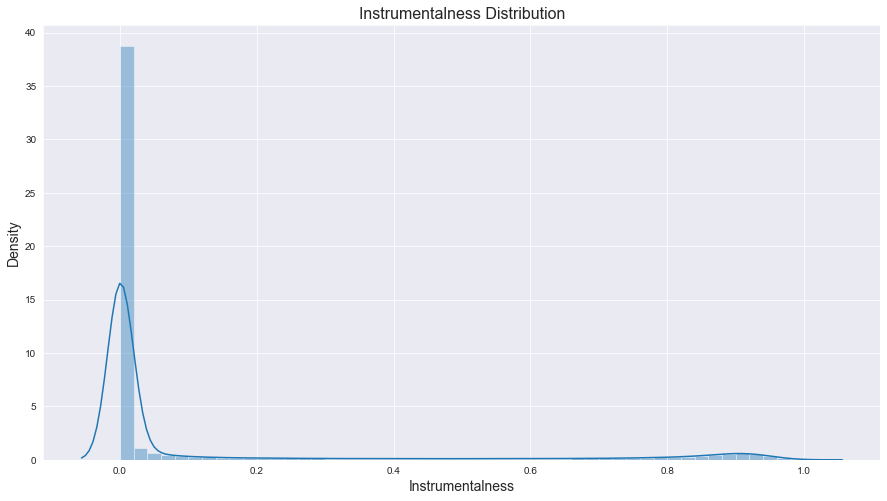

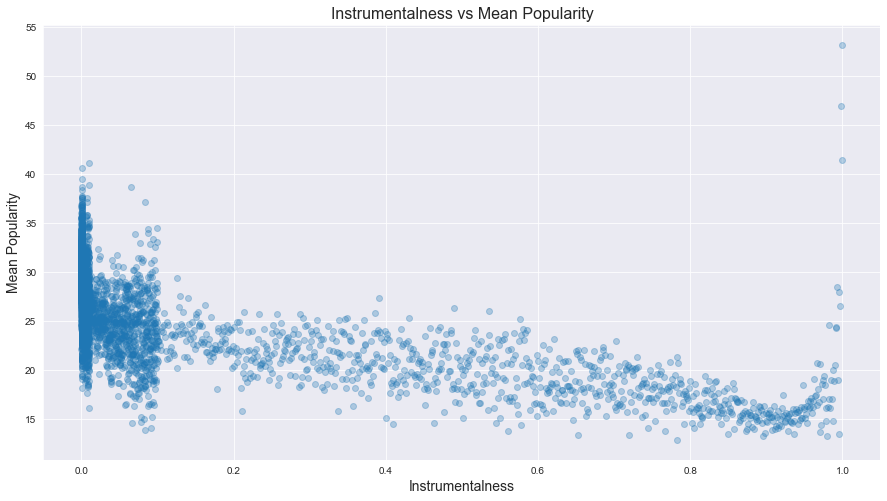

In [73]:
feature_analysis('instrumentalness')

#### Liveness

In [74]:
feature_corr('liveness')

Correlation to popularity with liveness is -0.049657502602716674


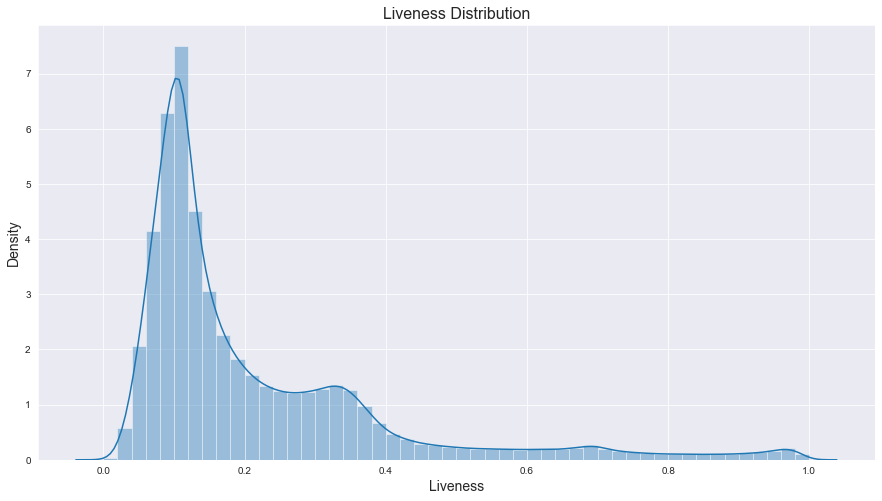

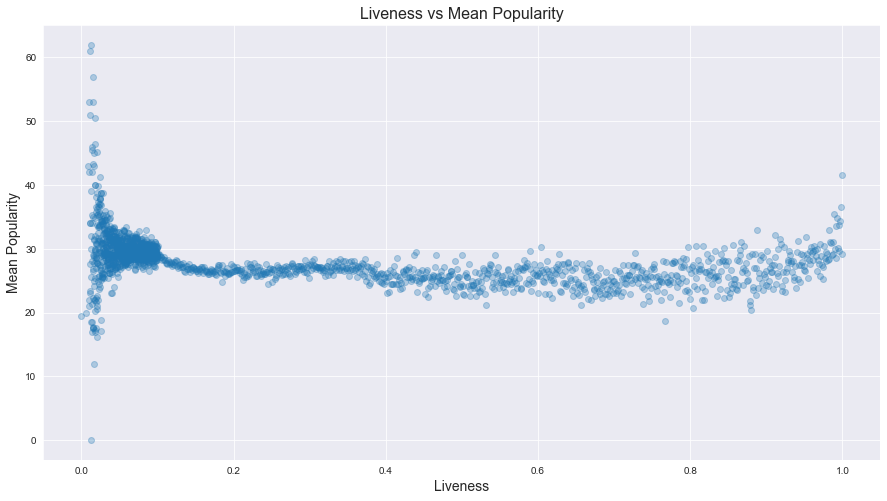

In [75]:
feature_analysis('liveness')

#### Valence

In [76]:
feature_corr('valence')

Correlation to popularity with valence is 0.003714630943866018


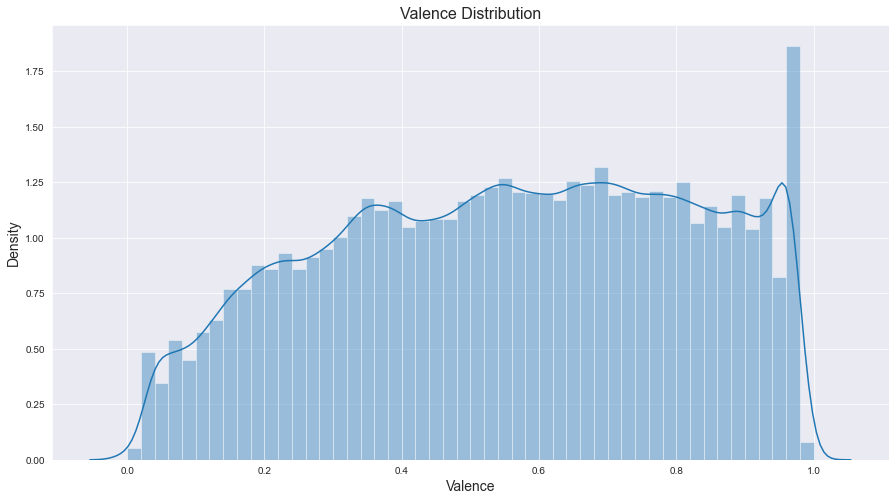

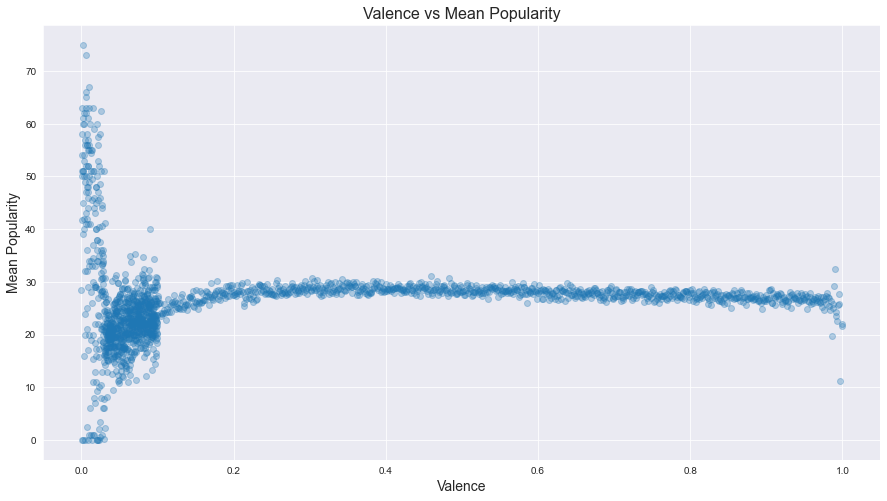

In [77]:
feature_analysis('valence')

#### Tempo

In [78]:
feature_corr('tempo')

Correlation to popularity with tempo is 0.07070413564749503


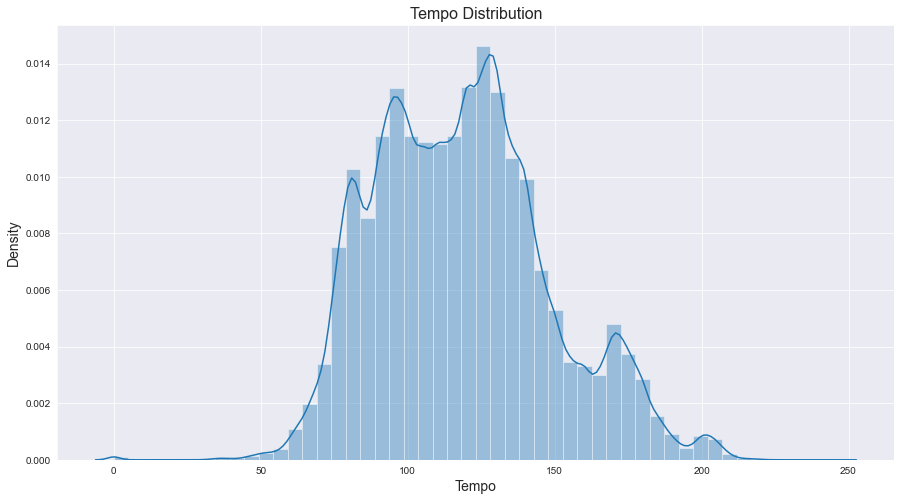

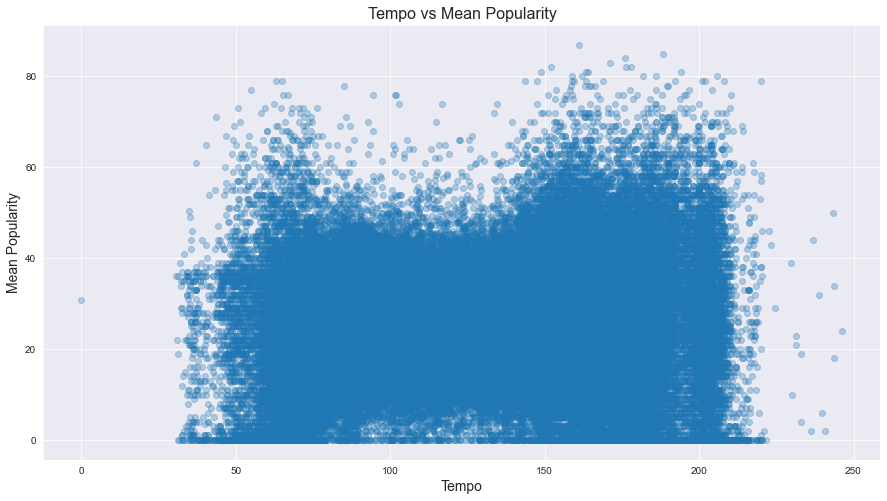

In [79]:
feature_analysis('tempo')

#### Duration

In [80]:
feature_corr('duration_ms')

Correlation to popularity with duration_ms is 0.028154897893097573


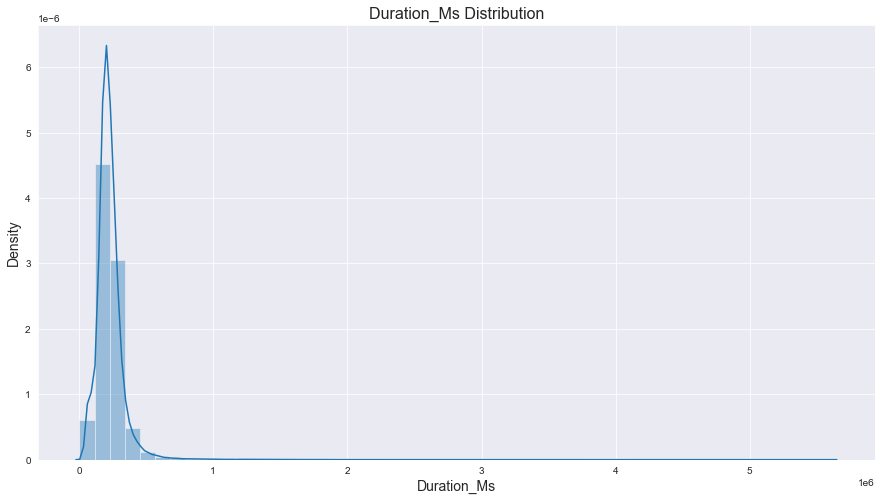

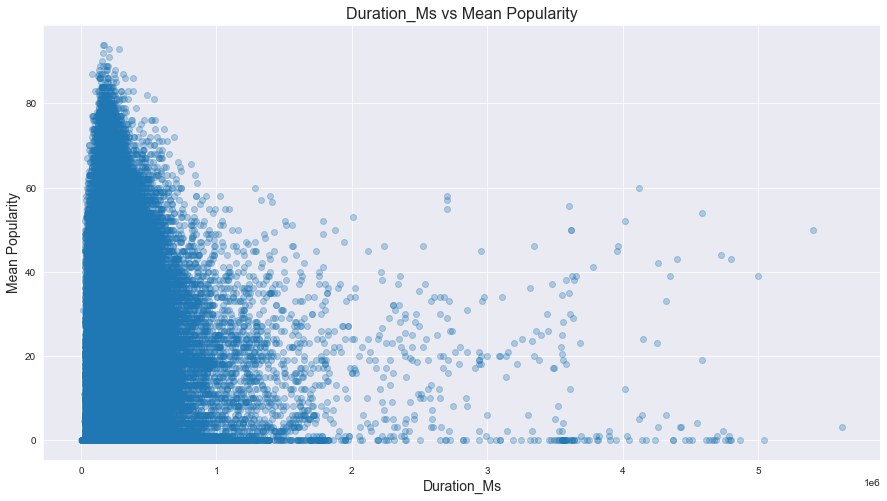

In [81]:
feature_analysis('duration_ms')

## Data Preparation

The initial variables dropped earlier were song title, song id, and artists id as those are not helpful for predictions. The artists column is converted to the mean of their popularity.

#### Splitting Target and Predictors

In [316]:
# Separating the target from the predictors
X = tracks.drop(['popularity', 'pop_artists_100songs'], axis=1)
y = tracks['popularity']

#### Splitting Training Set and Validation Set

In [317]:
# Separating the training set from the validation set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### Transforming Artists to Numeric

In [318]:
# Transforming the artists column into the mean of their popularity
class ArtistTransformer():
    """ Transforms artists column in df to mean popularity and changes values
    where artists appear less than mincount with y.mean() and more than max count with 0
    MinCnt: Min amount of times artist appears in data
    MaxCnt: Max times artists appear in dataset"""
    
    
    def __init__(self, MinCnt = 3.0, MaxCnt = 600.0):
        self.MinCnt = MinCnt
        self.MaxCnt = MaxCnt
        self.artists_df = None
  
    def fit (self, X, y):
        self.artists_df =  y.groupby(X.artists).agg(['mean', 'count'])
        self.artists_df.loc['unknown'] = [y.mean(), 1]
        self.artists_df.loc[self.artists_df['count'] <= self.MinCnt, 'mean'] = y.mean()
        self.artists_df.loc[self.artists_df['count'] >= self.MaxCnt, 'mean'] = 0
        return self

    def transform(self, X, y=None):
        X['artists'] = np.where(X['artists'].isin(self.artists_df.index), X['artists'], 'unknown')
        X['artists'] = X['artists'].map(self.artists_df['mean'])
        return X

In [319]:
# Fitting and transforming on X_train and transforming X_test
artists_transformer = ArtistTransformer(MinCnt=2)
X_train = artists_transformer.fit(X_train, y_train).transform(X_train, y_train)
X_test = artists_transformer.transform(X_test, y_test)

In [320]:
# Dropping mean as it's a derivative of our target, popularity, and highly correlated with it
X_train = X_train.drop('mean', axis=1)
X_test = X_test.drop('mean', axis=1)

#### OneHotEncoding Categoricals

In [321]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto', drop='first', sparse=False)

In [322]:
# Transforming X_train for keys
key_ohe = ohe.fit_transform(X_train[['key']])
keys_df = pd.DataFrame(key_ohe, index=X_train.index, columns=['key_'+str(i) for i in list(set(X_train['key'].values))[1:]])
X_train = pd.concat([X_train, keys_df], axis=1).drop('key', axis=1)

# Transforming X_test for keys
test_key_ohe = ohe.fit_transform(X_test[['key']])
test_keys_df = pd.DataFrame(test_key_ohe, index=X_test.index, columns=['key_'+str(i) for i in list(set(X_test['key'].values))[1:]])
X_test = pd.concat([X_test, test_keys_df], axis=1).drop('key', axis=1)

In [323]:
# Transforming X_train for time_signature
timesig_ohe = ohe.fit_transform(X_train[['time_signature']])
timesig_df = pd.DataFrame(timesig_ohe, index=X_train.index, columns=['timesig_'+str(i) for i in list(set(X_train['time_signature'].values))[1:]])
X_train = pd.concat([X_train, timesig_df], axis=1).drop('time_signature', axis=1)

# Transforming X_test for time_signature
test_timesig_ohe = ohe.fit_transform(X_test[['time_signature']])
test_timesig_df = pd.DataFrame(test_timesig_ohe, index=X_test.index, columns=['timesig_'+str(i) for i in list(set(X_test['time_signature'].values))[1:]])
X_test = pd.concat([X_test, test_timesig_df], axis=1).drop('time_signature', axis=1)

In [324]:
# Transforming X_train for explicit
explicit_ohe = ohe.fit_transform(X_train[['explicit']])
explicit_df = pd.DataFrame(explicit_ohe, index=X_train.index, columns=['explicit_'+str(i) for i in list(set(X_train['explicit'].values))[1:]])
X_train = pd.concat([X_train, explicit_df], axis=1).drop('explicit', axis=1)

# Transforming X_test for explicit
test_explicit_ohe = ohe.fit_transform(X_test[['explicit']])
test_explicit_df = pd.DataFrame(test_explicit_ohe, index=X_test.index, columns=['explicit_'+str(i) for i in list(set(X_test['explicit'].values))[1:]])
X_test = pd.concat([X_test, test_explicit_df], axis=1).drop('explicit', axis=1)

In [325]:
# Transforming X_train for mode
mode_ohe = ohe.fit_transform(X_train[['mode']])
mode_df = pd.DataFrame(mode_ohe, index=X_train.index, columns=['mode_'+str(i) for i in list(set(X_train['mode'].values))[1:]])
X_train = pd.concat([X_train, mode_df], axis=1).drop('mode', axis=1)

# Transforming X_test for mode
test_mode_ohe = ohe.fit_transform(X_test[['mode']])
test_mode_df = pd.DataFrame(test_mode_ohe, index=X_test.index, columns=['mode_'+str(i) for i in list(set(X_test['mode'].values))[1:]])
X_test = pd.concat([X_test, test_mode_df], axis=1).drop('mode', axis=1)

#### Standard Scaling the Dataset

In [326]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns, index=X_test.index)

In [230]:
X_train

,duration_ms,artists,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,...,key_8,key_9,key_10,key_11,timesig_1,timesig_3,timesig_4,timesig_5,explicit_1,mode_1
39336,-0.818538,-0.210444,-1.033964,-0.751019,-0.978523,-0.042328,-0.435298,0.599905,-0.423872,-0.292219,...,-0.245322,2.826662,-0.262245,-0.267422,-0.106426,-0.351858,0.405551,-0.140352,-0.21432,0.719919
261304,-0.526282,0.091341,0.282680,1.285618,-0.914962,-0.568098,-0.186929,1.515113,1.444471,-0.227067,...,-0.245322,-0.353774,-0.262245,-0.267422,-0.106426,-0.351858,0.405551,-0.140352,-0.21432,0.719919
432101,0.421921,0.601209,0.151016,-0.895632,1.019663,0.993070,-0.250542,-0.266531,-0.423864,0.723077,...,-0.245322,-0.353774,-0.262245,-0.267422,-0.106426,2.842059,-2.465780,-0.140352,-0.21432,0.719919
403051,0.674647,-0.270312,0.370457,-0.293077,1.742665,0.417302,-0.318028,-1.289293,0.109940,0.847953,...,-0.245322,-0.353774,-0.262245,-0.267422,-0.106426,-0.351858,0.405551,-0.140352,-0.21432,0.719919
64542,0.074324,1.296337,0.107128,-1.028195,-0.509763,-0.405308,-0.404874,1.024516,3.177480,-0.520254,...,-0.245322,-0.353774,-0.262245,-0.267422,-0.106426,2.842059,-2.465780,-0.140352,-0.21432,0.719919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110565,1.212578,0.091341,0.589897,1.092800,0.193376,0.825949,-0.371684,-0.935006,-0.169747,-0.700510,...,-0.245322,2.826662,-0.262245,-0.267422,-0.106426,-0.351858,0.405551,-0.140352,-0.21432,-1.389045
260258,-0.355645,-1.482352,0.019351,-0.606406,0.904459,0.662766,-0.386620,-1.287577,-0.402745,0.641636,...,-0.245322,-0.353774,-0.262245,-0.267422,-0.106426,-0.351858,0.405551,-0.140352,-0.21432,0.719919
367107,0.279452,-0.181927,0.326568,0.164865,-0.239631,0.240536,-0.420916,0.129390,-0.423784,-0.536542,...,-0.245322,-0.353774,-0.262245,-0.267422,-0.106426,-0.351858,0.405551,-0.140352,-0.21432,0.719919
132565,-0.219595,0.091341,-2.833378,-0.407563,0.332414,0.248016,-0.073531,1.320022,-0.423872,0.348449,...,-0.245322,-0.353774,-0.262245,-0.267422,-0.106426,-0.351858,0.405551,-0.140352,-0.21432,0.719919


In [231]:
X_test

,duration_ms,artists,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,...,key_8,key_9,key_10,key_11,timesig_1,timesig_3,timesig_4,timesig_5,explicit_1,mode_1
31917,-0.566199,-0.371743,-1.341181,-0.588329,-1.153314,-1.509011,-0.352324,1.391747,-0.423865,-0.232496,...,-0.245322,-0.353774,-0.262245,-0.267422,-0.106426,-0.351858,0.405551,-0.140352,-0.21432,0.719919
372690,0.097666,0.091341,1.116555,1.743560,0.622409,1.094248,-0.326325,-0.926399,-0.423872,-0.525683,...,-0.245322,-0.353774,-0.262245,-0.267422,-0.106426,-0.351858,0.405551,-0.140352,-0.21432,0.719919
101277,0.425076,0.279848,-0.419530,1.442282,-0.382642,-1.060995,0.706425,-0.395636,-0.423840,-0.703767,...,-0.245322,-0.353774,-0.262245,-0.267422,-0.106426,-0.351858,0.405551,-0.140352,-0.21432,0.719919
191583,0.456090,0.765195,-0.682859,-0.883581,0.717750,-0.592900,-0.363940,-0.791557,-0.423301,0.343019,...,-0.245322,-0.353774,-0.262245,-0.267422,-0.106426,-0.351858,0.405551,-0.140352,-0.21432,0.719919
434855,-0.270544,1.288429,0.589897,0.592679,0.376112,1.237353,-0.435851,-1.061529,-0.423872,-0.629385,...,-0.245322,-0.353774,-0.262245,-0.267422,-0.106426,2.842059,-2.465780,-0.140352,-0.21432,0.719919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100886,-0.104103,-0.085279,-0.463418,0.568577,0.443645,0.236402,-0.413171,-1.264137,-0.423793,0.440748,...,-0.245322,2.826662,-0.262245,-0.267422,-0.106426,-0.351858,0.405551,-0.140352,-0.21432,0.719919
184876,-0.025665,0.084330,0.414345,1.556767,1.142812,0.596233,-0.129400,-1.093375,-0.423868,0.033544,...,-0.245322,-0.353774,3.813230,-0.267422,-0.106426,-0.351858,0.405551,-0.140352,-0.21432,-1.389045
12938,0.057812,-1.865399,-2.218944,-2.498430,-1.818714,-1.547789,-0.341814,0.866721,-0.069000,-0.635357,...,-0.245322,-0.353774,-0.262245,3.739406,-0.106426,2.842059,-2.465780,-0.140352,-0.21432,-1.389045
373722,0.199753,0.091341,1.292108,-0.154489,-0.823594,-0.089374,-0.404874,0.502359,0.015959,-0.585406,...,-0.245322,-0.353774,-0.262245,-0.267422,-0.106426,-0.351858,0.405551,-0.140352,-0.21432,-1.389045


## Modeling

In our modeling, we will be using Linear Regression as our starting model and build from there. We will be focusing our metric on mean squared error and converting it to root mean squared error while also looking at the r2 scores. 

#### First Simple Model with Acousticness

This model will be our baseline model of our target with one feature popularity is correlated with.

In [232]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.pipeline import make_pipeline

In [233]:
stratified_kfold = StratifiedKFold(n_splits=5, 
                                   random_state=42, 
                                   shuffle=True)

In [304]:
X_train_acoustic = X_train[['acousticness']]

In [305]:
lr_acoustic = LinearRegression()

In [313]:
lr_acoustic.fit(X_train_acoustic, y_train)

LinearRegression()

In [314]:
# Initiating dictionaries for mse and r2 scores
scores = {}
r2_scores = {}

In [315]:
base_cv = cross_validate(lr_acoustic, 
                         X_train_acoustic, 
                         y_train, 
                         cv=stratified_kfold, 
                         scoring=['neg_mean_squared_error', 'r2'])

base_mse = base_cv['test_neg_mean_squared_error'].mean()
base_r2 = base_cv['test_r2'].mean()
scores['base_mse'] = base_mse
r2_scores['base_r2'] = base_r2
print(f'Base MSE: {base_mse}')
print(f'Base R2: {base_r2}')

Base MSE: -290.0165873272468
Base R2: 0.13846210905451944


#### Model with Features with Correlation greater than .25

This model will add features and explore linear regression with columns of correlation greater than .25 with popularity.

In [249]:
corr_lr = LinearRegression()

In [250]:
cols = [col for col in X_train.columns if abs(X_train[col].corr(y_train))<0.25]

In [251]:
cols

['duration_ms',
 'danceability',
 'speechiness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'count',
 'key_1',
 'key_2',
 'key_3',
 'key_4',
 'key_5',
 'key_6',
 'key_7',
 'key_8',
 'key_9',
 'key_10',
 'key_11',
 'timesig_1',
 'timesig_3',
 'timesig_4',
 'timesig_5',
 'explicit_1',
 'mode_1']

In [252]:
corr_lr.fit(X_train.drop(cols, axis=1), y_train)

LinearRegression()

In [106]:
corr_cv = cross_validate(corr_lr, 
                         X_train.drop(cols, axis=1), 
                         y_train, 
                         cv=stratified_kfold, 
                         scoring=['neg_mean_squared_error', 'r2'])

In [107]:
corr_mse = corr_cv['test_neg_mean_squared_error'].mean()
corr_r2 = corr_cv['test_r2'].mean()
scores['corr_mse'] = corr_mse
r2_scores['corr_r2'] = corr_r2
print(f'Corr Train MSE: {corr_mse}')
print(f'Corr Train R2: {corr_r2}')

Corr Train MSE: -145.63166174101613
Corr Train R2: 0.5673792610698349


As expected, our score increased with more variables predicting our target.

#### Model with all Numeric Features

In this next model, we will add all the relevant numeric features to see if our scores improve.

In [108]:
lr_all = LinearRegression()

In [109]:
lr_all.fit(X_train, y_train)

LinearRegression()

In [110]:
lr_all_cv = cross_validate(lr_all, 
                           X_train, 
                           y_train, 
                           cv=stratified_kfold, 
                           scoring=['neg_mean_squared_error', 'r2'])

In [111]:
all_mse = lr_all_cv['test_neg_mean_squared_error'].mean()
all_r2 = lr_all_cv['test_r2'].mean()
scores['all_mse'] = all_mse
r2_scores['all_r2'] = all_r2
print(f'All Train MSE: {all_mse}')
print(f'All Train R2: {all_r2}')

All Train MSE: -132.05761496262411
All Train R2: 0.6077030274479351


Our model improved and we will continue with all the numeric features in our model.

#### Decision Tree Regression

The next model we will be exploring is the Decision Tree Regressor model.

In [125]:
from sklearn.tree import DecisionTreeRegressor

In [267]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [268]:
dtr_cv = cross_validate(dtr, 
                        X_train, 
                        y_train, 
                        cv=stratified_kfold,
                        scoring=['neg_mean_squared_error', 'r2'])

In [269]:
dtr_mse = dtr_cv['test_neg_mean_squared_error'].mean()
dtr_r2 = dtr_cv['test_r2'].mean()
scores['dtr_mse'] = dtr_mse
r2_scores['dtr_r2'] = dtr_r2
print(f'DTR Train MSE: {dtr_mse}')
print(f'DTR Train R2: {dtr_r2}')

DTR Train MSE: -191.44532888247622
DTR Train R2: 0.43128309554564764


#### Random Forest Regressor

In [133]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [134]:
rfr_pipe = make_pipeline(RandomForestRegressor(random_state=42, max_samples=.3))
rfr_pipe

Pipeline(steps=[('randomforestregressor',
                 RandomForestRegressor(max_samples=0.3, random_state=42))])

In [135]:
params = {'randomforestregressor__n_estimators': (10, 50),
         'randomforestregressor__max_depth': (15, 50, 100, None),
         'randomforestregressor__max_leaf_nodes': (100, 500, None)}

In [138]:
rfr_cv = GridSearchCV(rfr_pipe, 
                      cv=stratified_kfold, 
                      scoring='neg_mean_squared_error',
                      n_jobs=-1,
                      param_grid=params)

In [139]:
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('randomforestregressor',
                                        RandomForestRegressor(max_samples=0.3,
                                                              random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': (15, 50, 100,
                                                              None),
                         'randomforestregressor__max_leaf_nodes': (100, 500,
                                                                   None),
                         'randomforestregressor__n_estimators': (10, 50)},
             scoring='neg_mean_squared_error')

In [140]:
best_params = rfr_cv.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'randomforestregressor__max_depth': 100, 'randomforestregressor__max_leaf_nodes': None, 'randomforestregressor__n_estimators': 50}


In [141]:
rfr_gs_preds = rfr_cv.predict(X_train)

In [142]:
rfr_mse = -mean_squared_error(y_train, rfr_gs_preds)
scores['rfr_mse'] = rfr_mse

In [143]:
from sklearn.metrics import r2_score

In [144]:
rfr_mse = -mean_squared_error(y_train, rfr_gs_preds)
rfr_r2_score = r2_score(y_train, rfr_gs_preds)
r2_scores['rfr_r2'] = rfr_r2_score
print(f'RFR Train MSE: {rfr_mse}')
print(f'RFR Train R2: {rfr_r2_score}')

RFR Train MSE: -53.63181956614921
RFR Train R2: 0.8406786435171847


In [145]:
rfr = RandomForestRegressor(max_depth=15, 
                            max_samples=0.3,
                            n_estimators=50, 
                            random_state=42)

In [146]:
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, max_samples=0.3, n_estimators=50,
                      random_state=42)

In [147]:
rfr.feature_importances_
#smaller isnt the best

array([1.38432558e-02, 6.49980150e-01, 1.78021259e-01, 9.45353195e-03,
       1.01147263e-02, 1.11766333e-02, 8.42559908e-03, 1.63970158e-02,
       1.81261541e-02, 9.12059679e-03, 8.51188347e-03, 9.16385727e-03,
       4.90992934e-02, 4.92598126e-04, 4.70747644e-04, 4.25229040e-04,
       4.57057221e-04, 5.13141731e-04, 4.27458830e-04, 5.19090050e-04,
       4.82337319e-04, 4.62706227e-04, 4.57889267e-04, 4.24730893e-04,
       1.44277121e-04, 2.93614237e-04, 2.48136332e-04, 1.78842342e-04,
       1.94959125e-03, 6.18595864e-04])

In [148]:
print('Feature importances:')
for i, col in enumerate(X_train.columns):
    print(f'{col:12}: {rfr.feature_importances_[i]:.3f}')

Feature importances:
duration_ms : 0.014
artists     : 0.650
release_date: 0.178
danceability: 0.009
energy      : 0.010
loudness    : 0.011
speechiness : 0.008
acousticness: 0.016
instrumentalness: 0.018
liveness    : 0.009
valence     : 0.009
tempo       : 0.009
count       : 0.049
key_1       : 0.000
key_2       : 0.000
key_3       : 0.000
key_4       : 0.000
key_5       : 0.001
key_6       : 0.000
key_7       : 0.001
key_8       : 0.000
key_9       : 0.000
key_10      : 0.000
key_11      : 0.000
timesig_1   : 0.000
timesig_3   : 0.000
timesig_4   : 0.000
timesig_5   : 0.000
explicit_1  : 0.002
mode_1      : 0.001


### XGBoost

Our next model will go through an XGBoost model.

In [149]:
import xgboost as xgb

In [150]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', 
                          colsample_bytree=.3, 
                          learning_rate=.15, 
                          max_depth=50,
                          alpha=0, 
                          n_estimators=50,
                          n_jobs=-1,
                          eval_metric='rmse')

In [157]:
xg_reg.fit(X_train, y_train)

XGBRegressor(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, eval_metric='rmse',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.15, max_delta_step=0,
             max_depth=50, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=50, n_jobs=-1,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [158]:
xgb_preds = xg_reg.predict(X_train)

In [159]:
xgb_score = -mean_squared_error(y_train, xgb_preds)
(xgb_score)

-2.0647345061903466

In [170]:
xgb_r2 = r2_score(y_train, xgb_preds)
xgb_r2

0.9938663967591592

In [171]:
scores['xgb_score'] = xgb_score
r2_scores['xgb_r2'] = xgb_r2

In [180]:
# converting the MSE scores to RMSE
def f(x):
    return np.sqrt(-x)

rmse = {k: f(v) for k, v in scores.items()}

rmse

{'base_mse': 17.029873379659836,
 'corr_mse': 12.06779440250024,
 'all_mse': 11.491632388943884,
 'dtr_mse': 13.836377014322652,
 'rfr_mse': 7.3233748754347685,
 'xgb_score': 1.4369184062396676}

In [181]:
rmse.keys()

dict_keys(['base_mse', 'corr_mse', 'all_mse', 'dtr_mse', 'rfr_mse', 'xgb_score'])

In [182]:
rmse['base_rmse'] = rmse['base_mse']
del rmse['base_mse']
rmse['corr_rmse'] = rmse['corr_mse']
del rmse['corr_mse']
rmse['all_rmse'] = rmse['all_mse']
del rmse['all_mse']
rmse['dtr_rmse'] = rmse['dtr_mse']
del rmse['dtr_mse']
rmse['rfr_rmse'] = rmse['rfr_mse']
del rmse['rfr_mse']
rmse['xgb_rmse'] = rmse['xgb_score']
del rmse['xgb_score']

In [183]:
rmse

{'base_rmse': 17.029873379659836,
 'corr_rmse': 12.06779440250024,
 'all_rmse': 11.491632388943884,
 'dtr_rmse': 13.836377014322652,
 'rfr_rmse': 7.3233748754347685,
 'xgb_rmse': 1.4369184062396676}

In [184]:
rmse_df = pd.DataFrame(list(rmse.items()), columns=['Model', 'Score'])
rmse_df

,Model,Score
0,base_rmse,17.029873
1,corr_rmse,12.067794
2,all_rmse,11.491632
3,dtr_rmse,13.836377
4,rfr_rmse,7.323375
5,xgb_rmse,1.436918


Text(0, 0.5, 'RMSE')

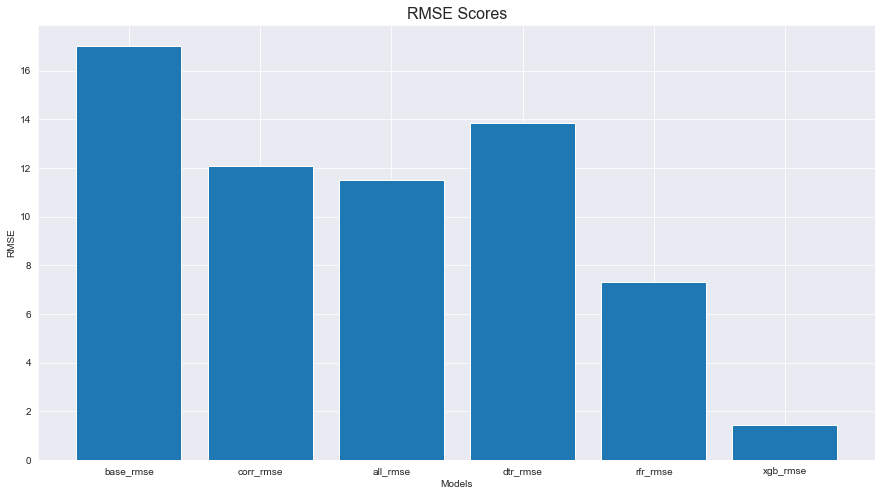

In [299]:
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(rmse_df['Model'], rmse_df['Score'])
ax.set_title('RMSE Scores', fontsize=16)
ax.set_xlabel('Models')
ax.set_ylabel('RMSE')

In [188]:
r2_df = pd.DataFrame(list(r2_scores.items()), columns=['Model', 'Score'])
r2_df

,Model,Score
0,base_r2,0.138462
1,corr_r2,0.567379
2,all_r2,0.607703
3,dtr_r2,0.431283
4,rfr_r2,0.840679
5,xgb_r2,0.993866


Text(0, 0.5, 'R2')

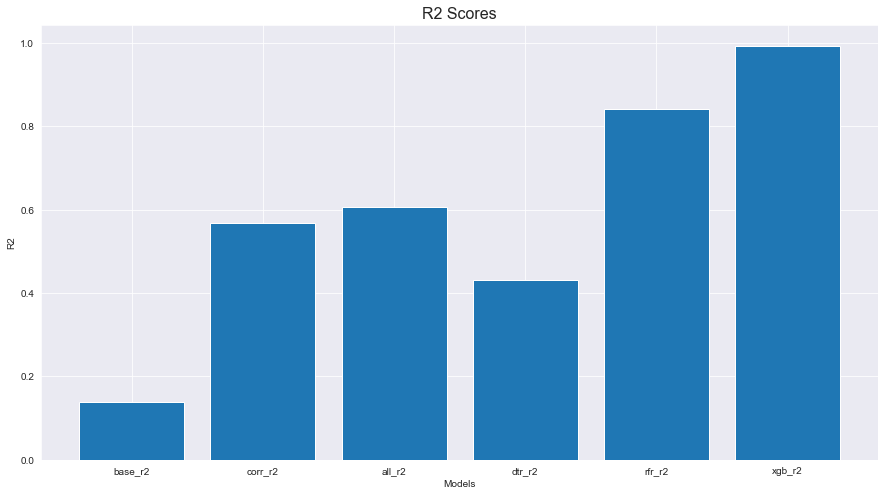

In [300]:
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(r2_df['Model'], r2_df['Score'])
ax.set_title('R2 Scores', fontsize=16)
ax.set_xlabel('Models')
ax.set_ylabel('R2')

## Evaluation

Below we will calculate our test scores for rmse and r2.

In [254]:
test_rmse = {}
test_r2 = {}

In [255]:
# Base model
base_test_preds = lr_acoustic.predict(X_test[['acousticness']])
test_rmse['base_test'] = np.sqrt(mean_squared_error(y_test, base_test_preds))
test_r2['base_test'] = r2_score(y_test, base_test_preds)

In [258]:
# Correlation > 0.25
corr_test_preds = corr_lr.predict(X_test.drop(cols, axis=1))
test_rmse['Corr_test'] = np.sqrt(mean_squared_error(y_test, corr_test_preds))
test_r2['Corr_test'] = r2_score(y_test, corr_test_preds)

In [260]:
# All
all_test_preds = lr_all.predict(X_test)
test_rmse['all_test'] = np.sqrt(mean_squared_error(y_test, all_test_preds))
test_r2['all_test'] = r2_score(y_test, all_test_preds)

In [271]:
# Decision Tree Regression
dtr_test_preds = dtr.predict(X_test)
test_rmse['dtr_test'] = np.sqrt(mean_squared_error(y_test, dtr_test_preds))
test_r2['dtr_test'] = r2_score(y_test, dtr_test_preds)

In [273]:
# Random Forest Regression
rfr_test_preds = rfr_cv.predict(X_test)
test_rmse['rfr_test'] = np.sqrt(mean_squared_error(y_test, rfr_test_preds))
test_r2['rfr_test'] = r2_score(y_test, rfr_test_preds)

In [275]:
# XGBoost
xgb_test_preds = xg_reg.predict(X_test)
test_rmse['xgb_test'] = np.sqrt(mean_squared_error(y_test, xgb_test_preds))
test_r2['xgb_test'] = r2_score(y_test, xgb_test_preds)

In [276]:
test_rmse

{'base_test': 16.999922522596705,
 'Corr_test': 12.601198397796113,
 'all_test': 12.074086430017172,
 'dtr_test': 14.173557131082688,
 'rfr_test': 10.33396117588932,
 'xgb_test': 13.114017437088933}

In [279]:
test_r2

{'base_test': 0.1381294210575884,
 'Corr_test': 0.5264434256975754,
 'all_test': 0.5652328400659423,
 'dtr_test': 0.40089093780249485,
 'rfr_test': 0.6815202506388889,
 'xgb_test': 0.4871153691027582}

In [281]:
test_rmse_df = pd.DataFrame(list(test_rmse.items()), columns=['Model', 'Score'])
test_rmse_df

,Model,Score
0,base_test,16.999923
1,Corr_test,12.601198
2,all_test,12.074086
3,dtr_test,14.173557
4,rfr_test,10.333961
5,xgb_test,13.114017


Text(0, 0.5, 'RMSE')

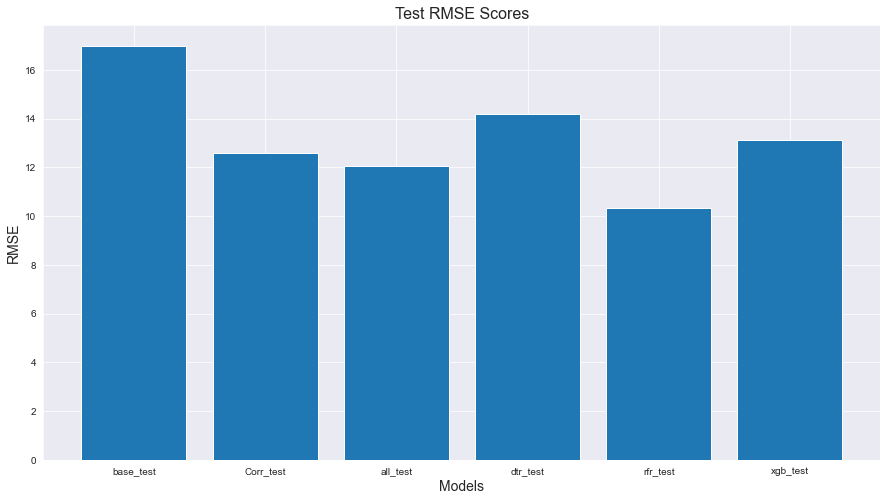

In [296]:
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(test_rmse_df['Model'], test_rmse_df['Score'])
ax.set_title('Test RMSE Scores', fontsize=16)
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('RMSE', fontsize=14)

In [297]:
test_r2_df = pd.DataFrame(list(test_r2.items()), columns=['Model', 'Score'])
test_r2_df

,Model,Score
0,base_test,0.138129
1,Corr_test,0.526443
2,all_test,0.565233
3,dtr_test,0.400891
4,rfr_test,0.681520
5,xgb_test,0.487115


Text(0, 0.5, 'R2')

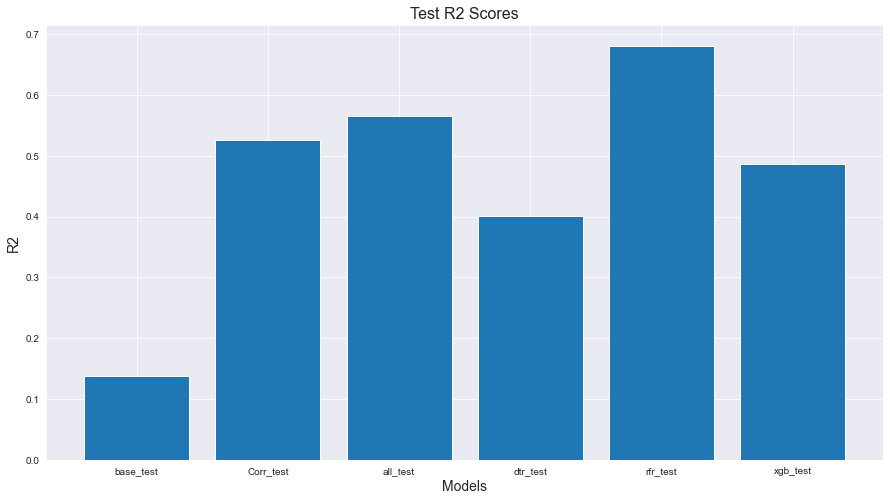

In [298]:
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(test_r2_df['Model'], test_r2_df['Score'])
ax.set_title('Test R2 Scores', fontsize=16)
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('R2', fontsize=14)

The RMSE scores for our linear regression models were almost the same, indicating that the training and test predictions performed roughly the same. The decision tree model also performed roughly the same on the training and validation set. The random forest regression model and the XGBoost models performed poorly on the validation set, indicating those models were overfit. Although the models were overfit, they still performed better than our baseline model. With these results, we are somewhat confident in our best model, the random forest regression model, and its ability generalize and predict popularity.

## Conclusions

As a result of this project, I believe we can recommend music production studios to make new songs with popular artists and to make the songs lean on the side of not acoustic. Some reasons why this analysis might not fully solve the problem is due to the parameter tuning of the model and the size of the data. Subsetting the data and dividing it out into genre models will most likely lead to better predictions for specific songs, which is also a next step improvement on the project.